In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [6]:
# Load dataset
df = pd.read_csv('wine.csv')



In [8]:
#Basic exploration
print(df.head())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [12]:
print(df.describe())


             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [14]:
print(df.isnull().sum())  # Check for missing values


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


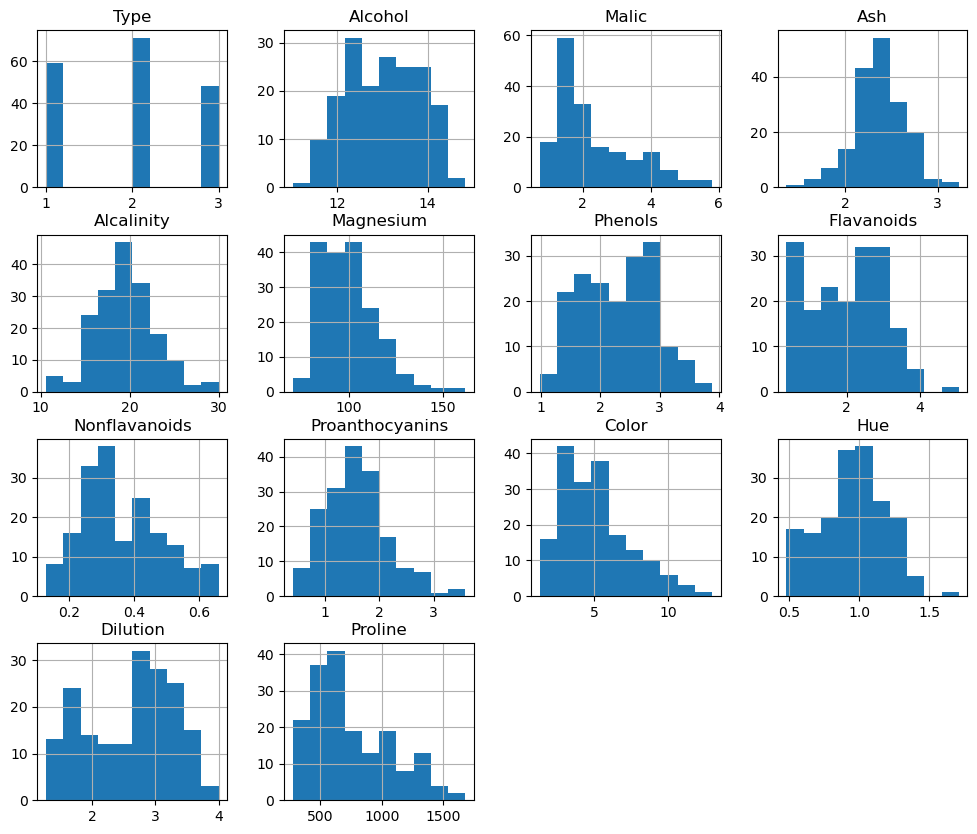

In [16]:
# Histograms
df.hist(bins=10, figsize=(12, 10))
plt.show()

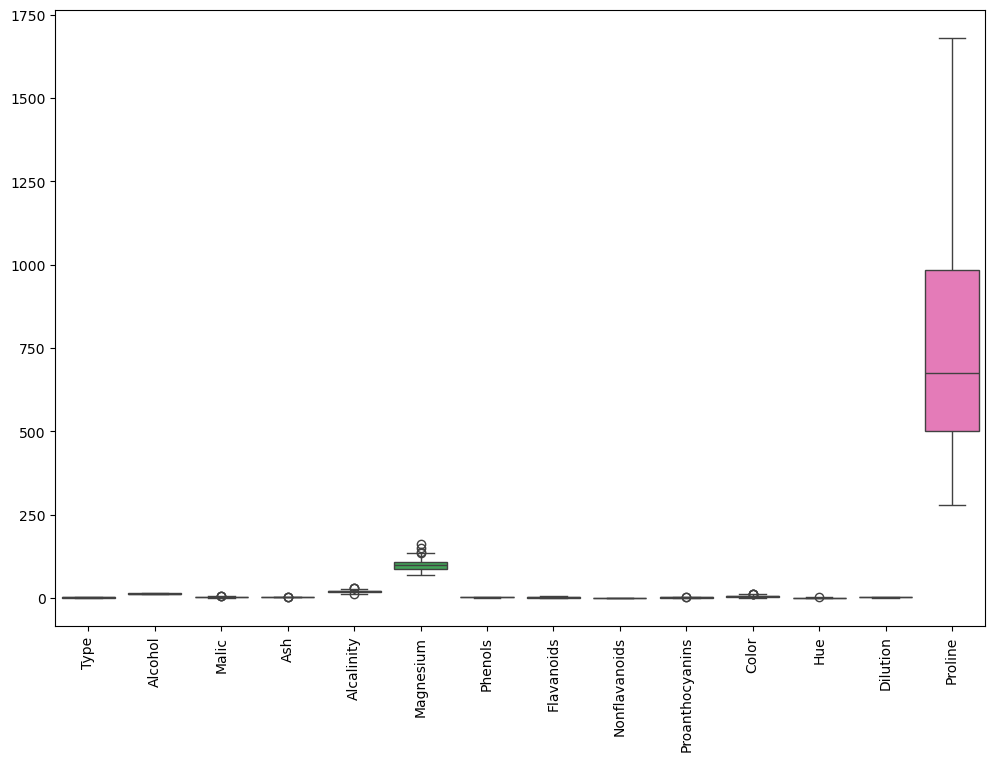

In [18]:
#Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

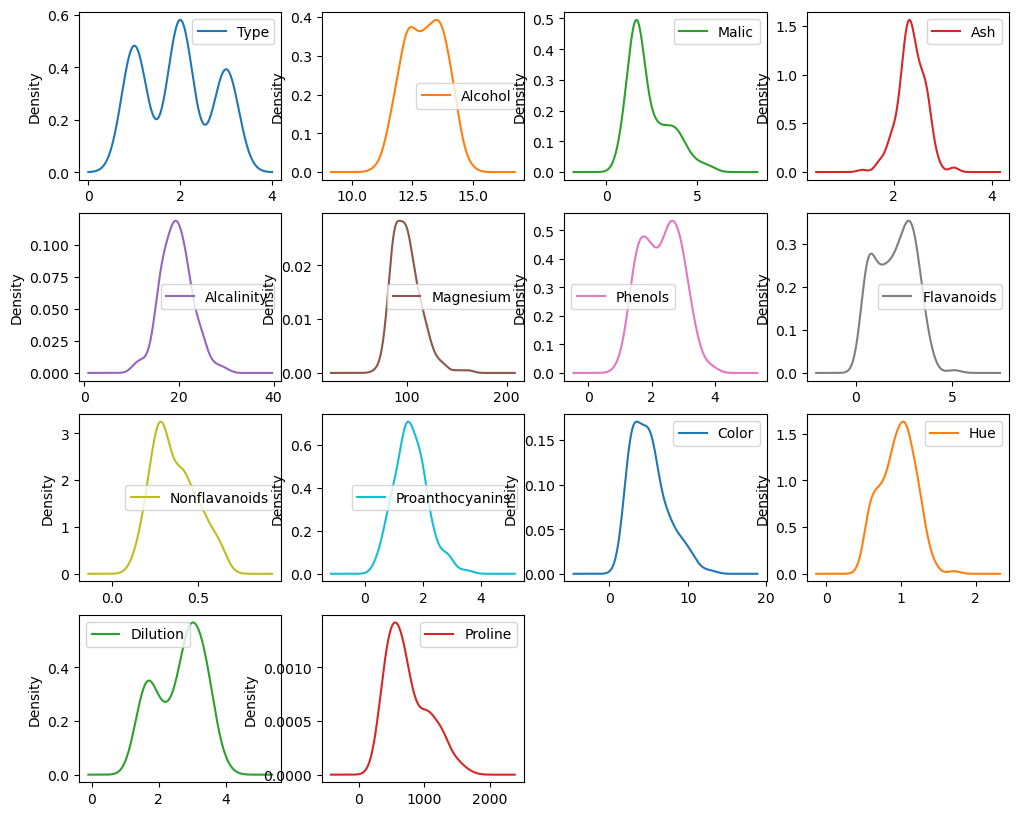

In [20]:
# Density plots
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.show()

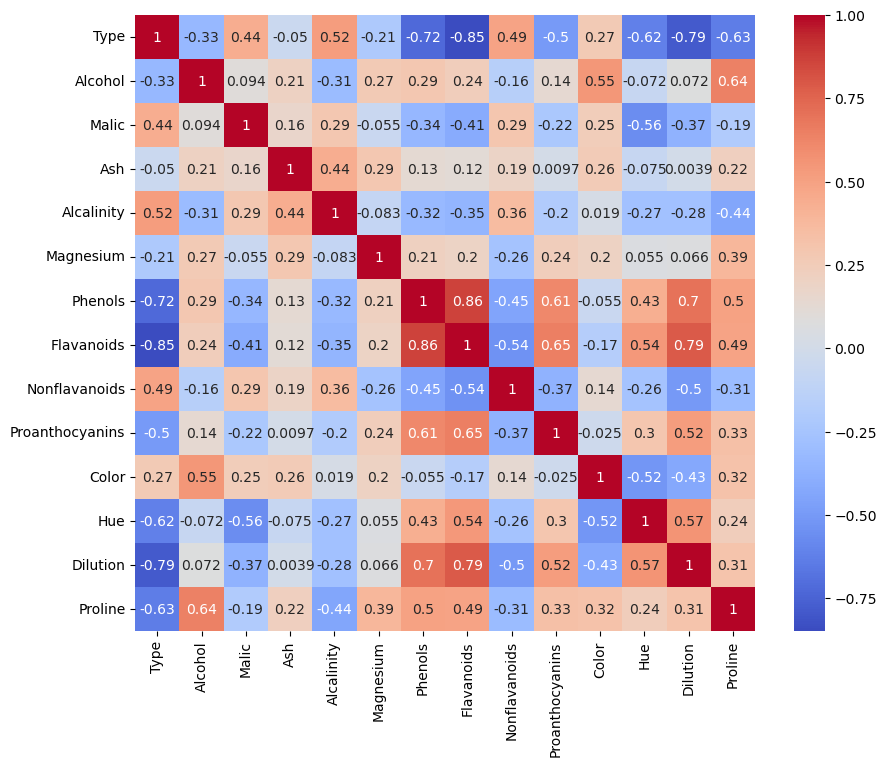

In [22]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Dimensionality Reduction with PCA

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = df.columns[1:]  # Exclude the target variable ('Type')
X = df[features]
X_scaled = StandardScaler().fit_transform(X)


In [27]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


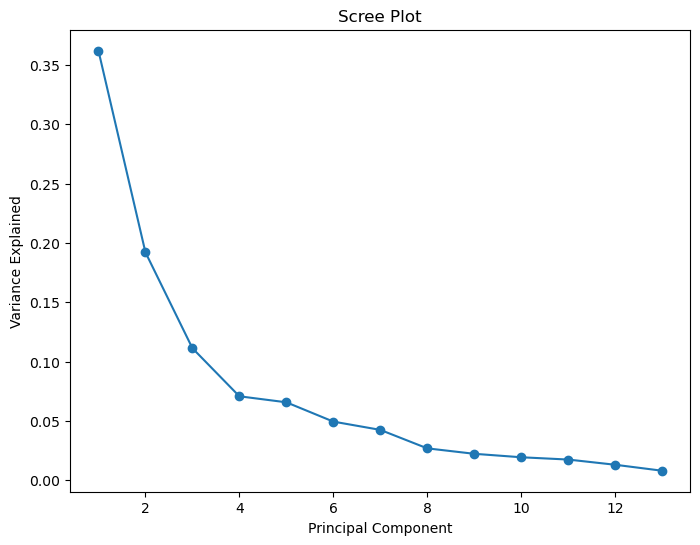

In [37]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()



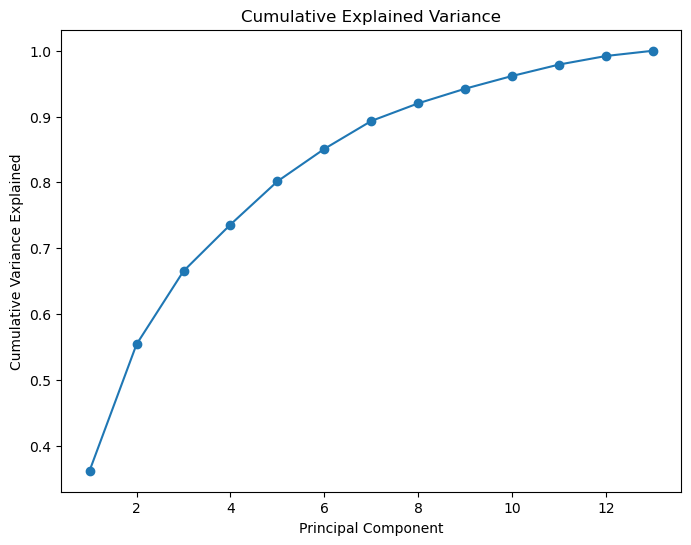

In [39]:
# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()


Transform the original dataset

In [44]:
# Set a threshold for explained variance (e.g., 90%)
explained_variance_threshold = 0.90

# Find the number of components that explain at least the threshold variance
optimal_components = next(i for i, cumulative_variance in enumerate(cumulative_variance) if cumulative_variance >= explained_variance_threshold) + 1

print(f'Optimal number of components: {optimal_components}')


Optimal number of components: 8


In [46]:
# Now apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)


Clustering with Original Data

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-means
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(X_scaled)

# Labels
labels_original = kmeans_original.labels_

# Silhouette Score
score_original = silhouette_score(X_scaled, labels_original)
print(f'Silhouette Score (Original Data): {score_original}')

# Davies–Bouldin Index for original data
db_index_original = davies_bouldin_score(X_scaled, labels_original)
print(f'Davies–Bouldin Index (Original Data): {db_index_original}')


Silhouette Score (Original Data): 0.2848589191898987
Davies–Bouldin Index (Original Data): 1.3891879777181648


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


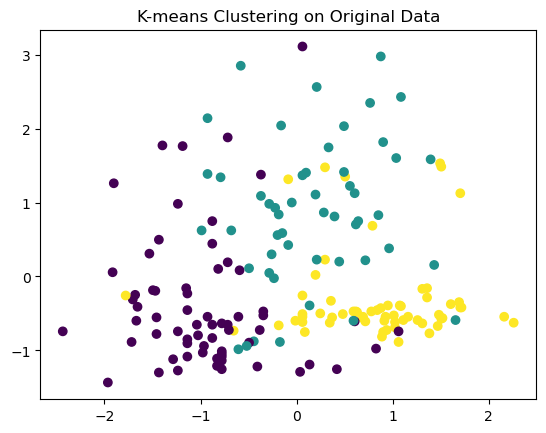

In [66]:
#visualizing clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_original, cmap='viridis')
plt.title('K-means Clustering on Original Data')
plt.show()


In [53]:
#Evaluate the clustering performance:
from sklearn.metrics import davies_bouldin_score

db_index_original = davies_bouldin_score(X_scaled, labels_original)
print(f'Davies–Bouldin Index (Original Data): {db_index_original}')


Davies–Bouldin Index (Original Data): 1.3891879777181648


Clustering with PCA Data

In [68]:
# Apply K-means on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca_optimal)

# Labels
labels_pca = kmeans_pca.labels_

# Silhouette Score
score_pca = silhouette_score(X_pca_optimal, labels_pca)
print(f'Silhouette Score (PCA Data): {score_pca}')

# Davies–Bouldin Index for PCA-transformed data
db_index_pca = davies_bouldin_score(X_pca_optimal, labels_pca)
print(f'Davies–Bouldin Index (PCA Data): {db_index_pca}')

Silhouette Score (PCA Data): 0.31496969547055614
Davies–Bouldin Index (PCA Data): 1.2668818314972177


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


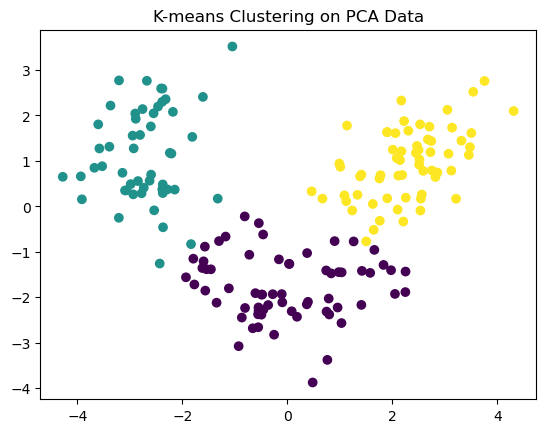

In [58]:
#Visualize clustering results:

plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=labels_pca, cmap='viridis')
plt.title('K-means Clustering on PCA Data')
plt.show()


#Key Observations
Silhouette Score: Higher for PCA data (0.315), indicating better-defined clusters.
Davies-Bouldin Index: Lower for PCA data (1.267), suggesting more compact and well-separated clusters.
Conclusion
PCA improved clustering performance by enhancing cluster distinctness and compactness.

Task 5: Comparison and Analysis

In [ ]:
#Clustering Results Comparison:

Silhouette Score:
Original Data: 0.285
PCA Data: 0.315
Davies–Bouldin Index:
Original Data: 1.389
PCA Data: 1.267
Conclusion: PCA-transformed data shows better clustering performance.

#Similarities/Differences:

Both datasets reveal distinct clusters.
PCA enhances cluster separation, making results clearer.

#Impact of Dimensionality Reduction:
PCA reduces noise and irrelevant features.
Captures variance in fewer dimensions, leading to more compact clusters.

#Trade-offs:
Advantages of PCA: Better-defined clusters, reduced computation time.
Disadvantages of PCA: Possible loss of important information, assumes linear relationships.


Task 6: Conclusion and Insights

In [ ]:
#Key Findings:
-PCA enhances clustering performance, indicated by improved silhouette scores and lower Davies–Bouldin indices.
Practical Implications:
-PCA simplifies analysis and improves interpretation of clustering results, especially in high-dimensional data.

#Recommendations:
-Use PCA when dealing with high-dimensional datasets or to improve clustering quality.
-Avoid PCA if important features may be lost or the original data provides sufficient clarity.